# Imports Básicos e leitura do arquivo csv

In [1]:
!pip install dask

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dask import dataframe as dd
import datetime 
import time
import seaborn as sns
sns.set()

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 9.0)

In [4]:
#anuncios_olx = dd.read_csv('anuncios_resumo2.csv', low_memory=False)
anuncios_olx = pd.read_csv('anuncios_resumo.csv', low_memory=False)
size = len(anuncios_olx)

In [5]:
anuncios_olx.head()

,url_lista,numero_pagina_lista,url_anuncio,categoria_completa,categoria_atual,titulo_anuncio,detalhes_anuncio,preco_anuncio,url_img_principal,qt_img_anuncio,localizacao_completa,localizacao_complemento,anuncio_profissional,data_publicacao_anuncio,data_coleta_dados
0,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,1,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,Eletrônicos e celulares;Computadores e acessórios,Computadores e acessórios,Notebook ASus (Aceito Oferta ou troca),NaN,1000.0,https://img.olx.com.br/thumbs256x256/78/789209...,3,"Brasil;MG;DDD 34 - Uberlândia, Uberaba e regiã...","Uberlândia, Dona Zulmira",0,2022-11-30 21:03,2022-11-30 21:15
1,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,1,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,Eletrônicos e celulares;Computadores e acessórios,Computadores e acessórios,Dell Inspiron 15 -i5 placa de video 2GB.,NaN,1900.0,https://img.olx.com.br/thumbs256x256/12/126261...,4,"Brasil;MG;DDD 34 - Uberlândia, Uberaba e regiã...","Uberlândia, Shopping Park",0,2022-11-30 21:02,2022-11-30 21:15
2,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,1,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,Eletrônicos e celulares;Computadores e acessórios,Computadores e acessórios,Ultrabook 4 meses de usado na caixa,NaN,2500.0,https://img.olx.com.br/thumbs256x256/24/244268...,6,"Brasil;MG;DDD 34 - Uberlândia, Uberaba e regiã...",Campo Florido,0,2022-11-30 21:02,2022-11-30 21:15
3,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,1,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,Eletrônicos e celulares;Computadores e acessórios,Computadores e acessórios,Notebook HP Intel core i3,NaN,550.0,https://img.olx.com.br/thumbs256x256/23/230216...,3,"Brasil;MG;DDD 34 - Uberlândia, Uberaba e regiã...","Uberlândia, São Jorge",0,2022-11-30 21:02,2022-11-30 21:15
4,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,1,https://mg.olx.com.br/regiao-de-uberlandia-e-u...,Eletrônicos e celulares;Computadores e acessórios,Computadores e acessórios,Notebook Samsung book,NaN,1900.0,https://img.olx.com.br/thumbs256x256/12/127214...,6,"Brasil;MG;DDD 34 - Uberlândia, Uberaba e regiã...","Uberlândia, Tubalina",0,2022-11-30 21:01,2022-11-30 21:15


# Análise Exploratória de Dados

Corrigindo os tipos de dados do dataframe

In [6]:
anuncios_olx['data_publicacao_anuncio'] = dd.to_datetime(anuncios_olx['data_publicacao_anuncio'], format='%Y-%m-%d %H:%M')
anuncios_olx['data_coleta_dados'] = dd.to_datetime(anuncios_olx['data_coleta_dados'], format='%Y-%m-%d %H:%M')

## Categoria mais relevante da OLX

Primeiro vamos ver qual é a categoria com mais anuncios na OLX

In [7]:
anuncios_olx['categoria'] = (anuncios_olx.categoria_completa
                             .str.extract(r'(.[\wA-Z\a-z0-9_-]+\;)')
                             .squeeze())

relevancia = (anuncios_olx
              .groupby(anuncios_olx.categoria)['url_lista']
              .count()
              .reset_index()
              .rename(columns={'categoria':'Categoria', 'url_lista':'Anuncios'}))

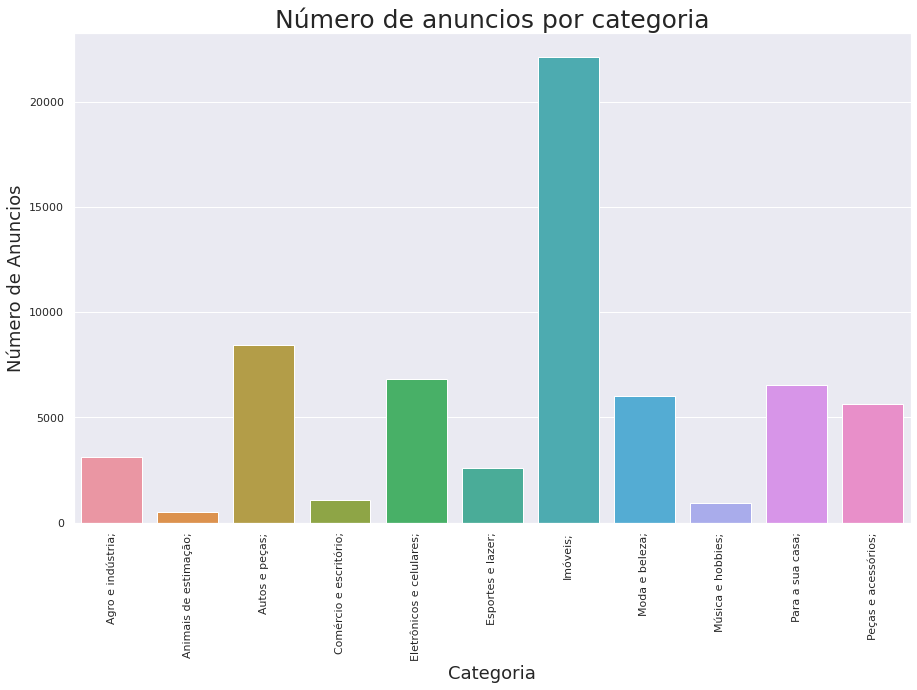

In [8]:
sns.barplot(x='Categoria', y='Anuncios', data=relevancia)


plt.title("Número de anuncios por categoria", fontsize=25)
plt.xlabel('Categoria', fontsize=18)
plt.ylabel('Número de Anuncios', fontsize=18)
plt.xticks(rotation=90)
plt.show()

Vemos que as três primeiras categorias são Imóveis, Itens para a sua casa, e Moda e Beleza.

## Anuncios por mês

In [9]:
anuncios_olx['mes_anuncio'] = anuncios_olx.data_publicacao_anuncio.dt.month
anuncios_olx['ano_anuncio'] = anuncios_olx.data_publicacao_anuncio.dt.year

In [10]:
anuncios_mes = (anuncios_olx
                .groupby('mes_anuncio')['url_lista']
                .count()
                .reset_index()
                .rename(columns={'mes_anuncio':'Mês', 'url_lista':'Anuncios'})
               )

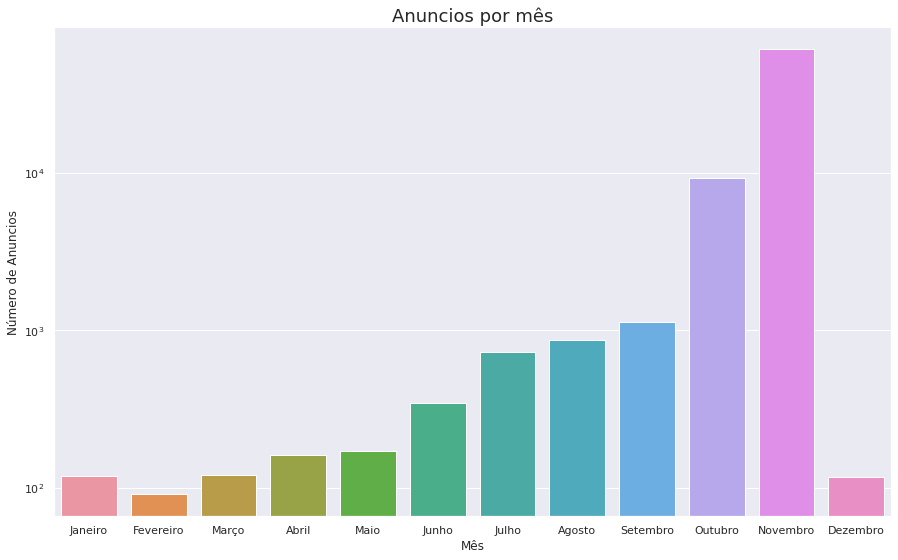

In [11]:
meses = [
    'Janeiro',
    'Fevereiro',
    'Março',
    'Abril',
    'Maio',
    'Junho',
    'Julho',
    'Agosto',
    'Setembro',
    'Outubro',
    'Novembro',
    'Dezembro'
]

anuncios_mes['Mês'] = meses
g = sns.barplot(x='Mês', y='Anuncios', data=anuncios_mes)
g.set_yscale('log')

plt.title("Anuncios por mês", fontsize=18)
plt.xlabel('Mês')
plt.ylabel('Número de Anuncios')
plt.show()

Como os anúncios foram extraídos no mês de novembro e a OLX coloca uma validade nos anúncios de um mês, vemos que temos uma quantidade maior nos meses de outubro e novembro.

In [12]:
anuncios_olx['local_estado'] = anuncios_olx.localizacao_completa.str.extract(r'(\DDD [\w]+)').squeeze()
local_estado = (anuncios_olx
                .groupby('local_estado')['url_lista']
                .count()
                .reset_index()
                .rename(columns={'local_estado':'Estado', 'url_lista':'Anuncios'})
               )

In [13]:
ddd_estado = {
'DDD 11':'SP', 'DDD 12':'SP', 'DDD 13':'SP', 'DDD 14':'SP', 'DDD 15':'SP', 'DDD 16':'SP', 'DDD 17':'SP', 'DDD 18':'SP', 'DDD 19':'SP',
'DDD 21':'RJ', 'DDD 22':'RJ', 'DDD 24':'RJ',
'DDD 27':'ES', 'DDD 28':'ES',
'DDD 31':'MG', 'DDD 32':'MG', 'DDD 33':'MG', 'DDD 34':'MG', 'DDD 35':'MG', 'DDD 37':'MG', 'DDD 38':'MG',
'DDD 41':'PR', 'DDD 42':'PR', 'DDD 43':'PR', 'DDD 44':'PR', 'DDD 45':'PR', 'DDD 46':'PR',
'DDD 47':'SC', 'DDD 48':'SC', 'DDD 49':'SC',
'DDD 51':'RS', 'DDD 53':'RS', 'DDD 54':'RS', 'DDD 55':'RS',
'DDD 68':'AC', 'DDD 96':'AP', 'DDD 92':'AM', 'DDD 97':'AM', 'DDD 91':'PA', 'DDD 93':'PA', 'DDD 94':'PA', 'DDD 69':'RO', 'DDD 95':'RR', 'DDD 63':'TO',
'DDD 82':'AL',
'DDD 71':'BA', 'DDD 73':'BA', 'DDD 74':'BA', 'DDD 75':'BA', 'DDD 77':'BA',
'DDD 85':'CE', 'DDD 88':'CE',
'DDD 98':'MA', 'DDD 99':'MA',
'DDD 83':'PB',
'DDD 81':'PE', 'DDD 87':'PE',
'DDD 86':'PI', 'DDD 89':'PI',
'DDD 84':'RN',
'DDD 79':'SE',
'DDD 61':'DF',
'DDD 62':'GO', 'DDD 64':'GO',
'DDD 65':'MT', 'DDD 66':'MT',
'DDD 67':'MS'
}

local_estado['Estado'] = local_estado['Estado'].map(ddd_estado)
local_estado = local_estado.groupby('Estado')['Anuncios'].sum().reset_index()
anuncios_olx['local_estado'] = anuncios_olx['local_estado'].map(ddd_estado)

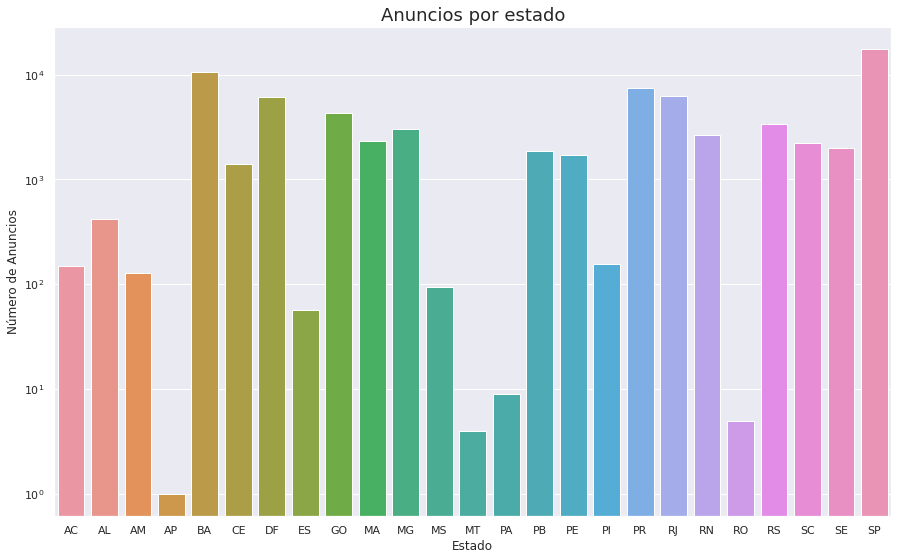

In [14]:
g = sns.barplot(x='Estado', y='Anuncios', data=local_estado)
g.set_yscale('log')

plt.title("Anuncios por estado", fontsize=18)
plt.xlabel('Estado')
plt.ylabel('Número de Anuncios')
plt.show()

## Preço médio por estado

In [15]:
preco_medio_estado = (anuncios_olx
                .groupby('local_estado')['preco_anuncio']
                .sum()
                .reset_index()
                .rename(columns={'local_estado':'Estado', 'url_lista':'Anuncios'})
               )
preco_medio_estado['preco_medio'] = preco_medio_estado['preco_anuncio'] / local_estado['Anuncios']

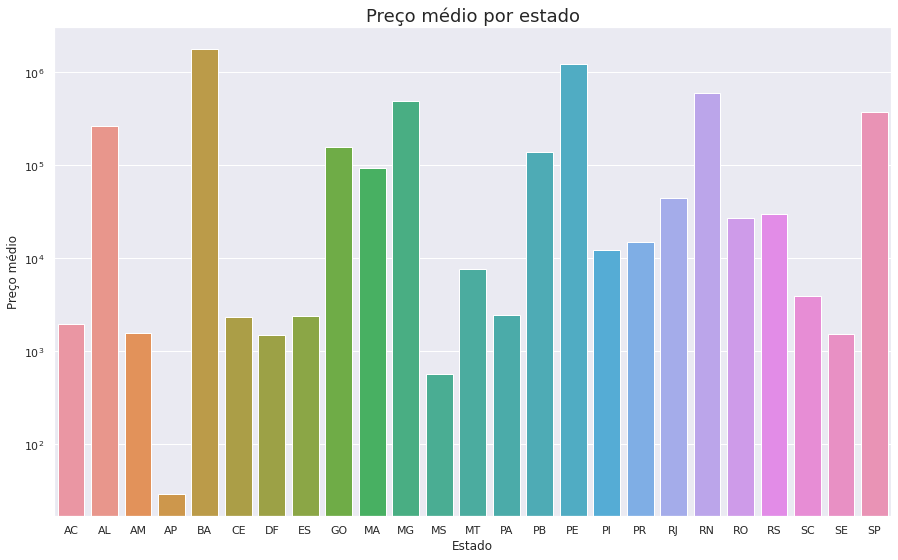

In [16]:
g = sns.barplot(x='Estado', y='preco_medio', data=preco_medio_estado)
g.set_yscale('log')

plt.title("Preço médio por estado", fontsize=18)
plt.xlabel('Estado')
plt.ylabel('Preço médio')
plt.show()

## Preço médio por estado na categoria imóveis

In [17]:
df = (anuncios_olx
          .groupby(['local_estado', 'categoria'])['preco_anuncio']
           .mean()
          .reset_index())

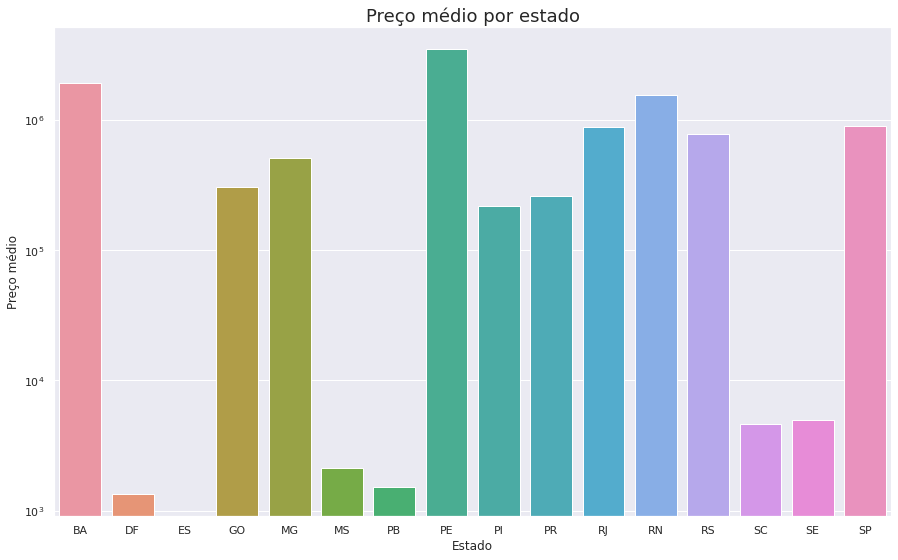

In [18]:
imoveis = df[df['categoria'] == 'Imóveis;']
g = sns.barplot(x='local_estado', y='preco_anuncio', data=imoveis)
g.set_yscale('log')

plt.title("Preço médio por estado", fontsize=18)
plt.xlabel('Estado')
plt.ylabel('Preço médio')
plt.show()

# Intervalo de Confiança

In [19]:
def bootstrap_mean(df, n=5000, size=None):
    if size is None:
        size = len(df)
    values = np.zeros(n)
    for i in range(n):
        sample = df.sample(size, replace=True)
        values[i] = sample.mean()
    return values

values = bootstrap_mean(anuncios_olx['preco_anuncio'])
np.percentile(values, 2.5).round(2), np.percentile(values, 97.5).round(2)

(387230.96, 534265.64)

Text(0, 0.5, 'P(media)')

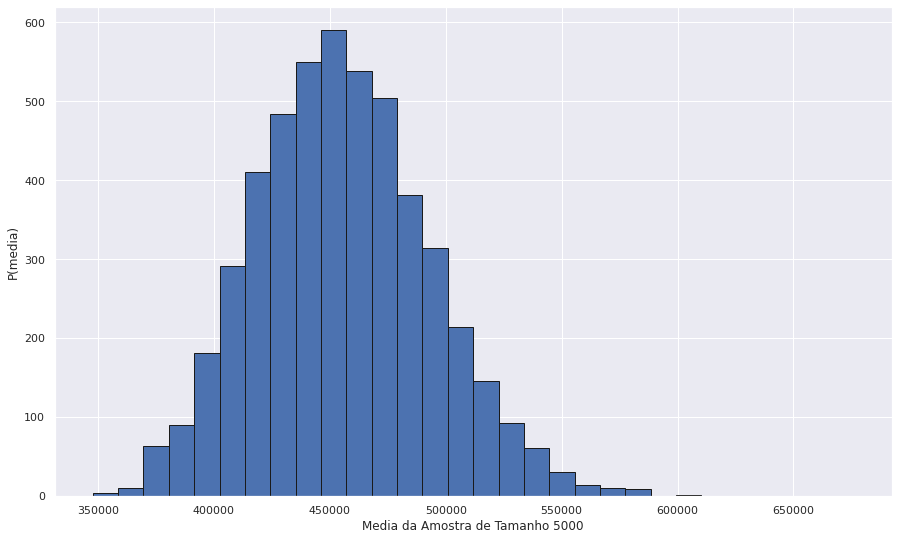

In [20]:
plt.hist(values, bins=30, edgecolor='k')
plt.xlabel('Media da Amostra de Tamanho 5000')
plt.ylabel('P(media)')